#Data Set
The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

#File descriptions
**labeledTrainData** - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  

**testData** - The test set. The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review. Your task is to predict the sentiment for each one. 

**unlabeledTrainData** - An extra training set with no labels. The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 

#Data fields
**id** - Unique ID of each review

**sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews

**review** - Text of the review

### Connect to Kaggle

We will be using data available on Kaggle platform for this exercise. The data is available at https://www.kaggle.com/c/word2vec-nlp-tutorial/data. We will first connect Colab to Kaggle. Instructions for downloading kaggle data to Colab can be found [in this post](https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463).

In [1]:
!pip install kaggle --upgrade

In [2]:
#Make a directory for Kaggle
!mkdir .kaggle

In [3]:
#Connect Google drive to colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
#Copy kaggle.json file. Change gdrive folder based on where you have saved your json file from Kaggle
!cp '/gdrive/My Drive/kaggle.json' /content/.kaggle/kaggle.json

In [5]:
#Check if json file is there
!ls -l /content/.kaggle

total 4
-rw------- 1 root root 71 Aug 11 11:16 kaggle.json


In [6]:
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


Verify Kaggle connection

In [7]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-09 11:16:59          10501  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6408  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2401  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2613  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

#### Download IMDB Movie Reviews data

In [8]:
#!kaggle competitions download -c word2vec-nlp-tutorial -p /content
!kaggle competitions download -c word2vec-nlp-tutorial -p /content

 40% 5.00M/12.6M [00:00<00:00, 37.6MB/s]
100% 12.6M/12.6M [00:00<00:00, 59.5MB/s]
 69% 9.00M/13.0M [00:00<00:00, 62.3MB/s]
100% 13.0M/13.0M [00:00<00:00, 63.4MB/s]
  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 100MB/s]
 92% 24.0M/26.0M [00:00<00:00, 102MB/s] 
100% 26.0M/26.0M [00:00<00:00, 102MB/s]


In [9]:
#Confirm data has been downloaded
!ls -l

total 53108
-rw-r--r-- 1 root root 13585269 Aug 11 11:17 labeledTrainData.tsv.zip
drwxr-xr-x 1 root root     4096 Jul 16 13:20 sample_data
-rw-r--r-- 1 root root   282796 Aug 11 11:17 sampleSubmission.csv
-rw-r--r-- 1 root root 13258140 Aug 11 11:17 testData.tsv.zip
-rw-r--r-- 1 root root 27243285 Aug 11 11:17 unlabeledTrainData.tsv.zip


Import the dataset as pandas dataframe

In [10]:
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('labeledTrainData.tsv.zip',header=0,delimiter="\t",quoting=3)

In [12]:
df.shape

(25000, 3)

In [13]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [14]:
df.groupby(['sentiment']).count()

,id,review
sentiment,,
0,12500,12500
1,12500,12500


In [15]:
df.loc[np.random.randint(0,df.shape[0]),'review'] # show a random review from the df

'"This was one of the lamest movies we watched in the last few months with a predictable plot line and pretty bad acting (mainly from the supporting characters). The interview with Hugh Laurie on the DVD was actually more rewarding than the film itself...<br /><br />Hugh Laurie obviously put a lot of effort into learning how to dance the Samba but the scope of his character only required that he immerse himself at the kiddie end of the pool. The movie is based on the appearance of a lovely girl and great music but these are not sufficient to make good entertainment.<br /><br />If you have never seen Rio, or the inside of a British bank, this film is for you. 2 out of 10."'

Split Data into Training and Test Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train , test  = train_test_split(df,test_size=0.8,random_state= 10) # train set is 20% of df and test set is 80%

In [18]:
train.shape, test.shape

((5000, 3), (20000, 3))

In [19]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [20]:
X_train = train['review']
y_train = train['sentiment']

In [21]:
X_test = test['review']
y_test = test['sentiment']

# Build the Tokenizer

In [22]:
import tensorflow as tf

In [23]:
desired_vocab_size = 30000
t = tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size)  # num_words -> vocabulary size

In [24]:
#Fit tokenizer with actual training data
t.fit_on_texts(X_train.to_list())

In [25]:
#Vocabulary
print(t.word_index)

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'but': 17, 'movie': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'who': 33, 'they': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'has': 43, 'out': 44, 'if': 45, 'there': 46, 'some': 47, 'what': 48, 'good': 49, 'very': 50, 'when': 51, 'more': 52, 'up': 53, 'no': 54, 'she': 55, 'even': 56, 'my': 57, 'time': 58, 'only': 59, 'would': 60, 'which': 61, 'really': 62, 'their': 63, 'see': 64, 'had': 65, 'story': 66, 'were': 67, 'can': 68, 'well': 69, 'me': 70, 'we': 71, 'than': 72, 'much': 73, 'bad': 74, 'will': 75, 'people': 76, 'because': 77, 'get': 78, 'been': 79, 'other': 80, 'into': 81, 'do': 82, 'him': 83, 'also': 84, 'first': 85, 'how': 86, 'great': 87, 'most': 88, 'then': 

In [26]:
len(t.word_index)

42495

In [27]:
t.word_counts

OrderedDict([("i'm", 874),
             ('afraid', 68),
             ('that', 13882),
             ("you'll", 284),
             ('find', 835),
             ('the', 66931),
             ('huge', 208),
             ('majority', 36),
             ('of', 29094),
             ('people', 1869),
             ('who', 4189),
             ('rate', 124),
             ('this', 15178),
             ('movie', 8567),
             ('as', 9169),
             ('a', 32919),
             ('10', 865),
             ('are', 5814),
             ('highly', 233),
             ('christian', 78),
             ('i', 15343),
             ('am', 527),
             ('not', 6221),
             ('if', 3279),
             ('you', 5940),
             ('looking', 501),
             ('for', 8791),
             ('recommend', 348),
             ('film', 7823),
             ('good', 2935),
             ('general', 133),
             ('need', 383),
             ('to', 27004),
             ('go', 1057),
             ('elsewher

# Prepare Training and Test Data

Get the word index for each of the word in the review

In [28]:
X_train[0]  # check first review in X_train

'"I\'m afraid that you\'ll find that the huge majority of people who rate this movie as a 10 are highly Christian. I am not. If you are looking for a Christian movie, I recommend this film. If you are looking for a good general movie, I\'m afraid you\'ll need to go elsewhere.<br /><br />I was annoyed by the characters, and their illogical behaviour. The premise of the movie is that the teaching of morality without teaching that it was Jesus who is the basis of morality is itself wrong. One scene shows the main character telling a boy that it is wrong to steal, and then the character goes on to say that it was Jesus who taught us this. I find that offensive: are we to believe that \\"thou shalt not steal\\" came from Jesus? I suppose he wrote the Ten Commandments? And stealing was acceptable before that? I rented the movie from Netflix. I should have realized the nature of the movie from the comments. Oh well."'

In [29]:
X_train = t.texts_to_sequences(X_train.to_list())

In [30]:
print(X_train[0]) # review as sequence of numbers

[154, 1591, 12, 443, 165, 12, 1, 602, 2673, 4, 76, 33, 966, 11, 18, 14, 2, 156, 23, 525, 1417, 10, 250, 21, 45, 22, 23, 261, 15, 2, 1417, 18, 10, 368, 11, 19, 45, 22, 23, 261, 15, 2, 49, 908, 18, 154, 1591, 443, 333, 5, 134, 2845, 7, 7, 10, 13, 3391, 31, 1, 103, 3, 63, 3728, 7091, 1, 935, 4, 1, 18, 6, 12, 1, 4858, 4, 2730, 193, 4858, 12, 9, 13, 1962, 33, 6, 1, 3008, 4, 2730, 6, 395, 357, 28, 132, 271, 1, 283, 107, 1055, 2, 428, 12, 9, 6, 357, 5, 2240, 3, 89, 1, 107, 269, 20, 5, 135, 12, 9, 13, 1962, 33, 4642, 175, 11, 10, 165, 12, 2424, 23, 71, 5, 255, 12, 9020, 14842, 21, 2240, 387, 36, 1962, 10, 1461, 26, 1045, 1, 795, 14843, 3, 2614, 13, 3492, 155, 12, 10, 1683, 1, 18, 36, 6648, 10, 141, 25, 1684, 1, 901, 4, 1, 18, 36, 1, 729, 449, 69]


In [31]:
t.sequences_to_texts([X_train[0]]) # review as text

["i'm afraid that you'll find that the huge majority of people who rate this movie as a 10 are highly christian i am not if you are looking for a christian movie i recommend this film if you are looking for a good general movie i'm afraid you'll need to go elsewhere br br i was annoyed by the characters and their illogical behaviour the premise of the movie is that the teaching of morality without teaching that it was jesus who is the basis of morality is itself wrong one scene shows the main character telling a boy that it is wrong to steal and then the character goes on to say that it was jesus who taught us this i find that offensive are we to believe that thou shalt not steal came from jesus i suppose he wrote the ten commandments and stealing was acceptable before that i rented the movie from netflix i should have realized the nature of the movie from the comments oh well"]

In [32]:
X_test = t.texts_to_sequences(X_test.tolist())

How many words in each review?

In [33]:
len(X_train[np.random.randint(0,5000)])

149

# Pad Sequences - Important

In [34]:
#Define maximum number of words to consider in each review
max_review_length = 300

In [35]:
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre', 
                                                        truncating='post')

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='post')

In [36]:
X_train.shape

(5000, 300)

In [37]:
X_test.shape

(20000, 300)

In [38]:
len(X_train[100])

300

In [39]:
X_train[100]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

#Build the Graph

In [40]:
#Initialize model

tf.keras.backend.clear_session()  # Clearing previous session
model = tf.keras.Sequential()

Add Embedding layer
 - Embedding Layer Input = Batch_Size * Length of each review

In [41]:
# Embedding Layer
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, # Vocabulary Size (plus 1 is added for the dummy word)
                                    50, # Embedding Size
                                    input_length = max_review_length)) # Number of words in each review

In [42]:
model.output

<KerasTensor: shape=(None, 300, 50) dtype=float32 (created by layer 'embedding')>

Embedding Layer Output - 
**[Batch_Size , Review Length , Embedding_Size]** 

Flatten the Output

In [43]:
model.add(tf.keras.layers.Flatten())

In [44]:
model.output

<KerasTensor: shape=(None, 15000) dtype=float32 (created by layer 'flatten')>

Add Dense Layer

In [45]:
model.add(tf.keras.layers.BatchNormalization()) # Adding Batch Normalization

In [46]:
model.output

<KerasTensor: shape=(None, 15000) dtype=float32 (created by layer 'batch_normalization')>

In [47]:
model.add(tf.keras.layers.Dense(128,activation='relu'))  # Adding Dense layer with 128 neurons

In [48]:
model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>

In [49]:
model.add(tf.keras.layers.Dropout(0.25)) # Adding Dropoout layer

In [50]:
model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dropout')>

Add Output layer as Dense with one neuron and Sigmoid activation

In [51]:
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Adding Output layer

In [52]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           1500050   
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15000)             60000     
_________________________________________________________________
dense (Dense)                (None, 128)               1920128   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,480,307
Trainable params: 3,450,307
Non-trainable params: 30,000
_________________________________________

#Execute the Graph

In [54]:
model.fit(X_train,y_train,
          epochs=5,
          batch_size=32,
          validation_data=(X_test,y_test))

Epoch 1/5
157/157 [==============================] - 13s 76ms/step - loss: 0.8565 - accuracy: 0.5810 - val_loss: 0.6914 - val_accuracy: 0.4988
Epoch 2/5
157/157 [==============================] - 11s 73ms/step - loss: 0.1016 - accuracy: 0.9640 - val_loss: 0.6685 - val_accuracy: 0.7079
Epoch 3/5
157/157 [==============================] - 12s 76ms/step - loss: 0.0247 - accuracy: 0.9950 - val_loss: 0.5540 - val_accuracy: 0.7138
Epoch 4/5
157/157 [==============================] - 12s 76ms/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.5535 - val_accuracy: 0.7486
Epoch 5/5
157/157 [==============================] - 12s 75ms/step - loss: 0.0216 - accuracy: 0.9978 - val_loss: 0.6597 - val_accuracy: 0.7437


##Use Pre-trained Embedding

In [55]:
import gensim.downloader as api

In [56]:
#Load glove model (similar to Word2Vec)
glove_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [57]:
#Size of model
glove_model.vectors.shape

(400000, 50)

In [64]:
glove_model['and'] #checking embedding for the word 'and'

array([ 0.26818 ,  0.14346 , -0.27877 ,  0.016257,  0.11384 ,  0.69923 ,
       -0.51332 , -0.47368 , -0.33075 , -0.13834 ,  0.2702  ,  0.30938 ,
       -0.45012 , -0.4127  , -0.09932 ,  0.038085,  0.029749,  0.10076 ,
       -0.25058 , -0.51818 ,  0.34558 ,  0.44922 ,  0.48791 , -0.080866,
       -0.10121 , -1.3777  , -0.10866 , -0.23201 ,  0.012839, -0.46508 ,
        3.8463  ,  0.31362 ,  0.13643 , -0.52244 ,  0.3302  ,  0.33707 ,
       -0.35601 ,  0.32431 ,  0.12041 ,  0.3512  , -0.069043,  0.36885 ,
        0.25168 , -0.24517 ,  0.25381 ,  0.1367  , -0.31178 , -0.6321  ,
       -0.25028 , -0.38097 ], dtype=float32)

In [65]:
#Initialize embedding matrix for our dataset with 10000+1 rows (1 for padding word)
# and 50 columns (as embedding size is 50)
embedding_matrix = np.zeros((desired_vocab_size+1,50))

In [66]:
for word, i in sorted(t.word_index.items(), key=lambda x:x[1]):
  if i > (desired_vocab_size+1):
    break
  try:
    embedding_vector = glove_model[word] # reading word embedding from glove model for a given word
    embedding_matrix[i] = embedding_vector
  except:
    pass

In [67]:
embedding_matrix[100]

array([ 0.11455   ,  0.065065  ,  0.28518999, -0.17229   , -0.39326999,
        0.0080943 , -0.48164999, -1.57159996, -0.17068   ,  1.72300005,
       -0.71525002,  0.78737998, -0.13594   ,  0.88042003,  1.73679996,
       -0.02498   ,  0.18193001,  0.64291   , -0.5424    ,  0.045482  ,
        1.02859998,  0.67105001,  0.78415   ,  1.03600001,  0.29029   ,
       -0.96087003, -1.67429996, -0.26859   ,  0.40321001, -1.00129998,
        2.40879989,  0.45552999,  0.54342002, -0.50339001, -0.11549   ,
        0.60122001, -0.10831   , -0.46849999, -1.40509999, -0.85930002,
       -0.183     ,  1.15680003,  0.10774   , -0.10742   , -0.56538999,
        0.27450001,  0.17375   , -0.85631001, -0.67383999,  0.65347999])

#Build a model using Pre-traind Embeddings

In [69]:
#Initialize a model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [70]:
model.add(tf.keras.layers.Embedding(desired_vocab_size+1, # Vocabulary size
                                    50, # Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_review_length))

In [71]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [72]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           1500050   
_________________________________________________________________
dropout (Dropout)            (None, 300, 50)           0         
_________________________________________________________________
flatten (Flatten)            (None, 15000)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1920128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,420,307
Trainable params: 1,920,257
Non-trainable params: 1,500,050
______________________________________

In [74]:
#Fit the model
model.fit(X_train,y_train,
          epochs=5,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 1/5
157/157 [==============================] - 6s 35ms/step - loss: 0.6777 - accuracy: 0.6050 - val_loss: 0.6337 - val_accuracy: 0.6488
Epoch 2/5
157/157 [==============================] - 5s 34ms/step - loss: 0.5172 - accuracy: 0.7478 - val_loss: 0.6070 - val_accuracy: 0.6747
Epoch 3/5
157/157 [==============================] - 5s 34ms/step - loss: 0.3822 - accuracy: 0.8336 - val_loss: 0.6592 - val_accuracy: 0.6506
Epoch 4/5
157/157 [==============================] - 5s 33ms/step - loss: 0.2855 - accuracy: 0.8786 - val_loss: 0.7682 - val_accuracy: 0.6672
Epoch 5/5
157/157 [==============================] - 5s 33ms/step - loss: 0.2020 - accuracy: 0.9186 - val_loss: 0.8284 - val_accuracy: 0.6686


In [78]:
model.fit(X_train,y_train,
          epochs=10,
          initial_epoch=5,
          batch_size=32,
          validation_data=(X_test,y_test))

Epoch 6/10
157/157 [==============================] - 5s 34ms/step - loss: 0.1588 - accuracy: 0.9402 - val_loss: 0.8754 - val_accuracy: 0.6679
Epoch 7/10
157/157 [==============================] - 5s 34ms/step - loss: 0.1140 - accuracy: 0.9606 - val_loss: 0.8891 - val_accuracy: 0.6680
Epoch 8/10
157/157 [==============================] - 5s 33ms/step - loss: 0.0833 - accuracy: 0.9734 - val_loss: 0.9669 - val_accuracy: 0.6625
Epoch 9/10
157/157 [==============================] - 5s 33ms/step - loss: 0.0773 - accuracy: 0.9736 - val_loss: 1.1499 - val_accuracy: 0.6610
Epoch 10/10
157/157 [==============================] - 5s 34ms/step - loss: 0.0845 - accuracy: 0.9706 - val_loss: 1.1441 - val_accuracy: 0.6593


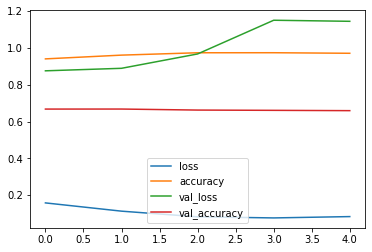

In [83]:
loss = pd.DataFrame(model.history.history)
loss.plot()

#### With Simple RNN

In [84]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [85]:
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    50, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_review_length) #Number of words in each review
          )

In [86]:
model.output

<KerasTensor: shape=(None, 300, 50) dtype=float32 (created by layer 'embedding')>

Add Simple RNN layer

In [87]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.SimpleRNN(128, activation='relu')) #RNN State - size of memory
model.add(tf.keras.layers.Dropout(0.25))

In [88]:
model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dropout_1')>

Output layer

In [89]:
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [90]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           1500050   
_________________________________________________________________
dropout (Dropout)            (None, 300, 50)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               22912     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,523,091
Trainable params: 23,041
Non-trainable params: 1,500,050
_________________________________________________________________


In [92]:
model.fit(X_train,y_train,
          epochs=5,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 1/5
157/157 [==============================] - 29s 179ms/step - loss: 0.7132 - accuracy: 0.5228 - val_loss: 0.6819 - val_accuracy: 0.5568
Epoch 2/5
157/157 [==============================] - 28s 182ms/step - loss: 0.6770 - accuracy: 0.5660 - val_loss: 0.6693 - val_accuracy: 0.5852
Epoch 3/5
157/157 [==============================] - 29s 183ms/step - loss: 0.6619 - accuracy: 0.5966 - val_loss: 0.6523 - val_accuracy: 0.6154
Epoch 4/5
157/157 [==============================] - 28s 178ms/step - loss: 0.6373 - accuracy: 0.6318 - val_loss: 0.6272 - val_accuracy: 0.6480
Epoch 5/5
157/157 [==============================] - 28s 178ms/step - loss: 0.6163 - accuracy: 0.6594 - val_loss: 0.6379 - val_accuracy: 0.6370


#### Using LSTM

In [93]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [94]:
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    50, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_review_length) #Number of words in each review
          )

In [95]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128)) #RNN State - size of memory

In [96]:
model.output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'lstm')>

In [97]:
model.add(tf.keras.layers.Dropout(0.25))

In [98]:
#Output
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [99]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           1500050   
_________________________________________________________________
dropout (Dropout)            (None, 300, 50)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,591,827
Trainable params: 91,777
Non-trainable params: 1,500,050
_________________________________________________________________


In [101]:
model.fit(X_train,y_train,
          epochs=5,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 1/5
157/157 [==============================] - 92s 576ms/step - loss: 0.6607 - accuracy: 0.6046 - val_loss: 0.5896 - val_accuracy: 0.6931
Epoch 2/5
157/157 [==============================] - 92s 585ms/step - loss: 0.6279 - accuracy: 0.6536 - val_loss: 0.5665 - val_accuracy: 0.7193
Epoch 3/5
157/157 [==============================] - 91s 585ms/step - loss: 0.5829 - accuracy: 0.7064 - val_loss: 0.5927 - val_accuracy: 0.6959
Epoch 4/5
157/157 [==============================] - 91s 584ms/step - loss: 0.5631 - accuracy: 0.7148 - val_loss: 0.6212 - val_accuracy: 0.6685
Epoch 5/5
157/157 [==============================] - 92s 585ms/step - loss: 0.5502 - accuracy: 0.7232 - val_loss: 0.5172 - val_accuracy: 0.7526


In [102]:
model.fit(X_train,y_train,
          epochs=25,
          initial_epoch=5,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 6/25
157/157 [==============================] - 92s 589ms/step - loss: 0.5144 - accuracy: 0.7518 - val_loss: 0.4811 - val_accuracy: 0.7804
Epoch 7/25
157/157 [==============================] - 93s 593ms/step - loss: 0.4767 - accuracy: 0.7740 - val_loss: 0.4909 - val_accuracy: 0.7603
Epoch 8/25
157/157 [==============================] - 93s 593ms/step - loss: 0.4663 - accuracy: 0.7812 - val_loss: 0.4991 - val_accuracy: 0.7808
Epoch 9/25
157/157 [==============================] - 93s 595ms/step - loss: 0.4371 - accuracy: 0.7954 - val_loss: 0.4270 - val_accuracy: 0.8069
Epoch 10/25
157/157 [==============================] - 93s 594ms/step - loss: 0.4164 - accuracy: 0.8060 - val_loss: 0.4347 - val_accuracy: 0.8063
Epoch 11/25
157/157 [==============================] - 93s 594ms/step - loss: 0.4037 - accuracy: 0.8160 - val_loss: 0.4048 - val_accuracy: 0.8162
Epoch 12/25
157/157 [==============================] - 93s 595ms/step - loss: 0.3880 - accuracy: 0.8230 - val_loss: 0.4076 - val

In [103]:
loss = pd.DataFrame(model.history.history)

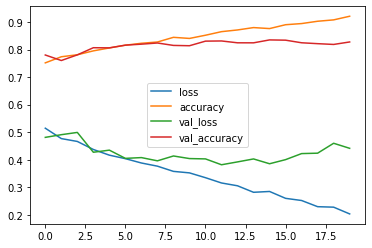

In [104]:
loss.plot()

### Download Google Word2Vec model

In [ ]:
!pip install googledrivedownloader

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='0B7XkCwpI5KDYNlNUTTlSS21pQmM',
                                    dest_path='./GoogleNews-vectors-negative300.bin.gz',
                                    unzip=True)

Unzipping...

/usr/local/lib/python3.7/dist-packages/google_drive_downloader/google_drive_downloader.py:78: UserWarning: Ignoring `unzip` since "0B7XkCwpI5KDYNlNUTTlSS21pQmM" does not look like a valid zip file
  warnings.warn('Ignoring `unzip` since "{}" does not look like a valid zip file'.format(file_id))


In [ ]:
import gzip
import shutil

In [ ]:
with gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
    with open('GoogleNews-vectors-negative300.bin', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
!ls -l

total 5220408
-rw-r--r-- 1 root root 3644258522 Jul 30 17:02 GoogleNews-vectors-negative300.bin
-rw-r--r-- 1 root root 1647046227 Jul 30 17:01 GoogleNews-vectors-negative300.bin.gz
-rw-r--r-- 1 root root   13585269 Jul 30 16:59 labeledTrainData.tsv.zip
drwxr-xr-x 1 root root       4096 Jul 16 13:20 sample_data
-rw-r--r-- 1 root root     282796 Jul 30 16:59 sampleSubmission.csv
-rw-r--r-- 1 root root   13258140 Jul 30 16:59 testData.tsv.zip
-rw-r--r-- 1 root root   27243285 Jul 30 16:59 unlabeledTrainData.tsv.zip


### Get Pre-trained Embeddings

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

# Load pretrained model
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
#Loading your own trained
#word2vec = gensim.models.Word2Vec.load('word2vec-movie-50')

In [ ]:
embedding_vector_length = 300

In [ ]:
#Initialize embedding matrix
embedding_matrix = np.zeros((desired_vocab_size + 1, embedding_vector_length))

In [ ]:
#Load word vectors for each word from Google Word2Vec model
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = model[word] #Reading word's embedding from Google Word2Vec
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [ ]:
#embedding_matrix[2]

### Build Model

In [ ]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

Add Embedding layer
 - Embedding Layer Input = Batch_Size * Length of each review

In [ ]:
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    300, #Embedding size
                                    weights=[embedding_matrix],
                                    trainable=False,
                                    input_length=max_review_length) #Number of words in each review
          )

In [ ]:
model.output

<KerasTensor: shape=(None, 300, 300) dtype=float32 (created by layer 'embedding')>

Embedding Layer Output - 
[Batch_Size , Review Length , Embedding_Size]

Add LSTM Layer with 256 as RNN state size

In [ ]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
model.output

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dropout_1')>

Use Dense layer for output layer

In [ ]:
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          3000300   
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               570368    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 3,570,925
Trainable params: 570,625
Non-trainable params: 3,000,300
_________________________________________________________________


### Train Model

In [ ]:
model.fit(X_train,y_train,
          epochs=20,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 1/20
625/625 [==============================] - 23s 25ms/step - loss: 0.6198 - accuracy: 0.6698 - val_loss: 0.5997 - val_accuracy: 0.6778
Epoch 2/20
625/625 [==============================] - 15s 24ms/step - loss: 0.5779 - accuracy: 0.6992 - val_loss: 0.5275 - val_accuracy: 0.7562
Epoch 3/20
625/625 [==============================] - 15s 25ms/step - loss: 0.4968 - accuracy: 0.7580 - val_loss: 0.3272 - val_accuracy: 0.8656
Epoch 4/20
625/625 [==============================] - 16s 25ms/step - loss: 0.3303 - accuracy: 0.8594 - val_loss: 0.3133 - val_accuracy: 0.8698
Epoch 5/20
625/625 [==============================] - 16s 26ms/step - loss: 0.2973 - accuracy: 0.8757 - val_loss: 0.2769 - val_accuracy: 0.8892
Epoch 6/20
625/625 [==============================] - 16s 25ms/step - loss: 0.2788 - accuracy: 0.8860 - val_loss: 0.2923 - val_accuracy: 0.8818
Epoch 7/20
625/625 [==============================] - 16s 25ms/step - loss: 0.2695 - accuracy: 0.8890 - val_loss: 0.2610 - val_accuracy:

In [ ]:
loss = pd.DataFrame(model.history.history)

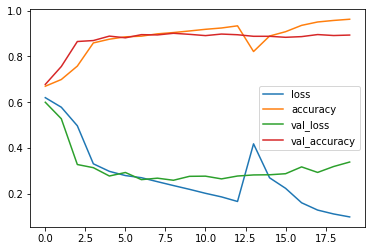

In [ ]:
loss.plot()

### Download Pre - trained Glove model from Stanford

Check out this [link](https://nlp.stanford.edu/projects/glove/) for available pre-trained Glove models from Standord.

https://nlp.stanford.edu/projects/glove/

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
#Check if embeddings have been downloaded
!ls -l

In [ ]:
#unzip the file, we get multiple embedding files. We can use either one of them
!unzip glove.6B.zip

We have 4 models in this zip file. '50d' in the filename means that embedding size is 50 (100d means embedding size 100). We can use any one of the 4 models.

In [ ]:
!ls -l

### Convert Glove to Word2Vec format

In [ ]:
#Install Gensim
!pip install gensim --quiet

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
#Glove file - we are using model with 50 embedding size
glove_input_file = 'glove.6B.50d.txt'

#Name for word2vec file
word2vec_output_file = 'glove.6B.50d.txt.word2vec'

#Convert Glove embeddings to Word2Vec embeddings
glove2word2vec(glove_input_file, word2vec_output_file)

In [ ]:
!ls -l

### Get Embeddings (from Pre-trained model)

Pre-trained Glove model has 400,000 unique words (Vocabulary size). We do not need all the words. Moreover, we have to arrange word embeddings according to word index created by our tokenizers above. So we will extract word embeddings for only the words that we are interested in.

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
# Load pretrained Glove model (in word2vec form)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
#Embedding length based on selected model - we are using 50d here.
embedding_vector_length = 50

Initialize a embedding matrix which we will populate for our vocabulary words.

In [ ]:
#Initialize embedding matrix
embedding_matrix = np.zeros((desired_vocab_size + 1, embedding_vector_length))

In [ ]:
embedding_matrix.shape

Load word vectors for each word in our vocabulary from from Glove pre-trained model

In [ ]:
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = glove_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

In [ ]:
#Word the - index 1
embedding_matrix[3]

### Build Model for Sentiment Analysis

In [ ]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

Add Embedding layer
 - Embedding Layer Input = Batch_Size * Length of each review

In [ ]:
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

In [ ]:
model.output

Embedding Layer Output - 
[Batch_Size , Review Length , Embedding_Size]

Add LSTM Layer with 256 as RNN state size

In [ ]:
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
model.output

Use Dense layer for output layer

In [ ]:
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

### Train Model

In [ ]:
model.fit(X_train,y_train,
          epochs=10,
          batch_size=32,          
          validation_data=(X_test, y_test))

In [ ]:
model.save('Movie_with_oretrained.h5')

In [ ]:
!ls -l

Getting output of LSTM layer

In [ ]:
x = model.get_layer('lstm').output

In [ ]:
model2 = tf.keras.Model(model.input, x)

In [ ]:
model2.predict(X_test[0:1]).shape